# Crash Course IA - Aula 2 - Regressão Linear
Este é o primeiro exercício prático do Crash Course de IA, uma iniciativa em adaptar a disciplina de IA do TIDD/PUC-SP para uma versão online e acessível para todos. <br> Neste tutorial, vamos treinar um modelo de regressão linear para predição de valores contínuos. As aulas estão disponíveis no YouTube: https://youtu.be/Ze-Q6ZNWpco <br><br>

Qualquer dúvida, entre em contato:<br>
https://twitter.com/diogocortiz <br>
https://instagram.com/diogocortiz

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

# Download do Dataset

In [3]:
!pip3 install wget
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/Regress%C3%A3o%20Linear/FuelConsumptionCo2.csv

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=cefd3109053d8b6a350b4106124349bdfc5883792ac82e5bb598ac0a97ac40b4
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
--2020-04-02 13:45:06--  https://raw.githubusercontent.com/diogocortiz/CrashCourseML/master/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.01s   

2020-04-02 13:45:06 (5.07 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



#Carregar o dataset para um Dataframe (Pandas)

In [4]:
# Cria um dataset chamado 'df' que receberá os dados do csv
df = pd.read_csv("FuelConsumptionCo2.csv")

#EXIBE A ESTRUTURA DO DATAFRAME
print(df.head())

   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]


# Exibe o resumo do Dataset

In [5]:
print(df.describe())

       MODELYEAR   ENGINESIZE  ...  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
count     1067.0  1067.000000  ...               1067.000000   1067.000000
mean      2014.0     3.346298  ...                 26.441425    256.228679
std          0.0     1.415895  ...                  7.468702     63.372304
min       2014.0     1.000000  ...                 11.000000    108.000000
25%       2014.0     2.000000  ...                 21.000000    207.000000
50%       2014.0     3.400000  ...                 26.000000    251.000000
75%       2014.0     4.300000  ...                 31.000000    294.000000
max       2014.0     8.400000  ...                 60.000000    488.000000

[8 rows x 8 columns]


# Selecionar apenas as features do Motor e CO2

In [6]:
motores =  df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]
print(motores.head())



   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


#Dividir o dataset em dados de treinamento e dados de teste
neste casos vamos usar o train_test_split do scikitlearn

In [7]:
motores_treino, motores_test, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)
print(type(motores_treino))


<class 'pandas.core.frame.DataFrame'>


#Exibir a correlação entre as features do dataset de treinamento

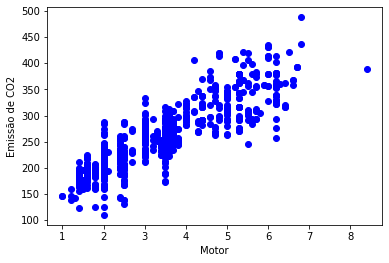

In [8]:
plt.scatter(motores_treino, co2_treino, color='blue')
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")
plt.show()

# Vamos treinar o modelo de regressão linear

In [9]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

# TREINAR O MODELO USANDO O DATASET DE TESTE
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)
modelo.fit(motores_treino, co2_treino)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Exibir os coeficientes (A e B)

In [10]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)


(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


# Vamos exibir a nossa reta de regressão no dataset de treino

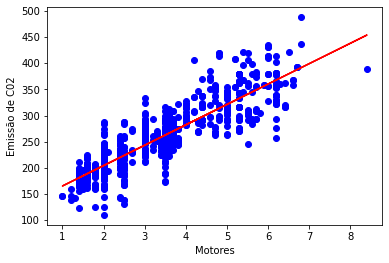

In [11]:
plt.scatter(motores_treino, co2_treino, color='blue')
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

# Vamos executar o nosso modelo no dataset de teste

In [0]:
#Primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoesCo2 = modelo.predict(motores_test)



# Vamos exibir a nossa reta de regressão no dataset de teste

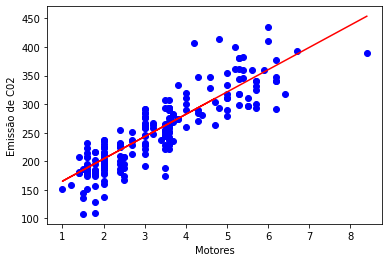

In [13]:
plt.scatter(motores_test, co2_teste, color='blue')
plt.plot(motores_test, modelo.coef_[0][0]*motores_test + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

# Vamos avaliar o modelo

In [14]:
#Agora é mostrar as métricas
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , co2_teste) )

Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
